In [37]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS
import dateparser
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Next we need to load our Chat.txt into Python and read it. We will do this using the function below:

In [2]:
def read_file(file):
    '''Reads Whatsapp text file into a list of strings'''
    x = open(file,'r', encoding = 'utf-8') #Opens the text file into variable x but the variable cannot be explored yet
    y = x.read() #By now it becomes a huge chunk of string that we need to separate line by line
    content = y.splitlines() #The splitline method converts the chunk of string into a list of strings
    return content

Next we use the read_file function to read our Chat.txt file into Python and save it to a variable named chat.

In [3]:
chat = read_file('Chat.txt')
len(chat)

2358

Some messages are not useful for our analysis and we will need to remove them. Example is the system generated message showing that someone just joined the group chat. Let us save all these messages into a variable named join.

In [4]:
join = [line for line in chat if  "joined using this" in line]
join

["11/15/19, 06:31 - You joined using this group's invite link",
 "11/15/19, 08:56 - Richie joined using this group's invite link",
 "11/15/19, 09:26 - +234 803 941 3525 joined using this group's invite link",
 "11/15/19, 09:47 - +234 813 589 2611 joined using this group's invite link",
 "11/15/19, 18:14 - +234 806 351 4863 joined using this group's invite link",
 "11/17/19, 09:25 - +234 806 227 6975 joined using this group's invite link",
 "11/17/19, 13:01 - +234 813 949 1652 joined using this group's invite link",
 "11/18/19, 19:38 - Opeyemi Tosin joined using this group's invite link",
 "12/4/19, 16:22 - +234 703 275 3450 joined using this group's invite link",
 "12/4/19, 16:35 - +234 806 968 0974 joined using this group's invite link",
 "12/4/19, 16:47 - +234 816 249 9900 joined using this group's invite link",
 "12/4/19, 16:48 - +234 703 240 3988 joined using this group's invite link",
 "12/4/19, 17:43 - +234 813 314 3743 joined using this group's invite link",
 "12/4/19, 18:02 - +

In [5]:
#Remove new lines
chat = [line.strip() for line in chat]
chat[:10]
print("length of chat is:")
print(len(chat))

#Clean out the join notification lines
clean_chat = [line for line in chat if not "joined using this" in line]

#Further cleaning
#Remove empty lines
clean_chat = [line for line in clean_chat if len(line) > 1]
print("length of clean_chat is:")
print(len(clean_chat))

length of chat is:
2358
length of clean_chat is:
2012


In [6]:
#Drop 'left-ers'
left = [line for line in clean_chat if line.endswith("left")]
left

[]

In [7]:
#Remove all that 'left'
#Clean out the left notification lines
clean_chat = [line for line in clean_chat if not line.endswith("left")]
print(len(clean_chat))

2012


In [8]:
#Merge messages that belong together
msgs = [] #message container
pos = 0 #counter for position of msgs in the container
"""
Flow:
For every line, see if it matches the expression which is starting with the format "number(s)+slash" eg "12/"
If it does, it is a new line of conversion as they begin with dates, add it to msgs container
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line.
"""
for line in clean_chat:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)

len(msgs)

1472

In [9]:
msgs[0:10]

['11/15/19, 06:31 - Messages to this group are now secured with end-to-end encryption. Tap for more info.',
 '11/11/19, 09:41 - Analoh RESAGRATIA created group "RESA"',
 "11/15/19, 07:06 - AcidiQ: Good morning Fam.. I just went through the Budget project workflow on the Resagratia website, it's really awesome and inspiring.. It's great to be here.",
 '11/15/19, 07:29 - +234 805 230 5080: Sounds great',
 '11/15/19, 08:09 - Oluwatobi Williams RESAGRATIA: Pleasure to have you join us',
 "11/15/19, 08:32 - AcidiQ: Thank you Boss.. I've accessed the Doc file. Hope I'm free to work on any Ministry and extract relevant data?",
 "11/15/19, 08:34 - +234 907 199 5587: Good morning data fellows, can anyone please share the framework/template you're using to input the extracted data so someone don't do something else, thanks.",
 '11/15/19, 08:40 - Oluwatobi Williams RESAGRATIA: Yes. Any MDA that is left *Open* can be worked on.',
 '11/15/19, 08:42 - Oluwatobi Williams RESAGRATIA: Do you mean the f

In [10]:
time = [msgs[i].split(',')[1].split('-')[0] for i in range(len(msgs))]
time = [s.strip(' ') for s in time] # Remove spacing
print("length of time is:")
print(len(time))
time[:10]

length of time is:
1472


['06:31',
 '09:41',
 '07:06',
 '07:29',
 '08:09',
 '08:32',
 '08:34',
 '08:40',
 '08:42',
 '08:42']

In [11]:
date = [msgs[i].split(',')[0] for i in range(len(msgs))]
len(date)

1472

In [12]:
## Get name
name = [msgs[i].split('-')[1].split(':')[0] for i in range(len(msgs))]
len(name)

1472

In [13]:

content = []
for i in range(len(msgs)):
  try:
    content.append(msgs[i].split(':')[2])
  except IndexError:
    content.append('Missing Text')
len(content)

1472

In [14]:
df = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date', 'Time', 'Name', 'Content'])
df

,Date,Time,Name,Content
0,11/15/19,06:31,Messages to this group are now secured with end,Missing Text
1,11/11/19,09:41,"Analoh RESAGRATIA created group ""RESA""",Missing Text
2,11/15/19,07:06,AcidiQ,Good morning Fam.. I just went through the Bu...
3,11/15/19,07:29,+234 805 230 5080,Sounds great
4,11/15/19,08:09,Oluwatobi Williams RESAGRATIA,Pleasure to have you join us
...,...,...,...,...
1467,1/7/20,05:13,+234 806 654 2723,I am a chartered accountant
1468,1/7/20,09:19,+234 706 811 1035,I am
1469,1/7/20,20:56,Oluwatobi Williams RESAGRATIA,Thank you. Will contact you tomorrow bro
1470,1/7/20,20:56,Oluwatobi Williams RESAGRATIA,Thank you bro. Will be in touch tomorrow.


In [15]:
df.shape

(1472, 4)

In [16]:
df = df[df["Content"]!='Missing Text']
df.reset_index(inplace=True, drop=True)
df

,Date,Time,Name,Content
0,11/15/19,07:06,AcidiQ,Good morning Fam.. I just went through the Bu...
1,11/15/19,07:29,+234 805 230 5080,Sounds great
2,11/15/19,08:09,Oluwatobi Williams RESAGRATIA,Pleasure to have you join us
3,11/15/19,08:32,AcidiQ,Thank you Boss.. I've accessed the Doc file. ...
4,11/15/19,08:34,+234 907 199 5587,"Good morning data fellows, can anyone please ..."
...,...,...,...,...
1460,1/7/20,05:13,+234 806 654 2723,I am a chartered accountant
1461,1/7/20,09:19,+234 706 811 1035,I am
1462,1/7/20,20:56,Oluwatobi Williams RESAGRATIA,Thank you. Will contact you tomorrow bro
1463,1/7/20,20:56,Oluwatobi Williams RESAGRATIA,Thank you bro. Will be in touch tomorrow.


In [17]:
df.shape

(1465, 4)

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['DateTime']

0      2019-11-15 07:06:00
1      2019-11-15 07:29:00
2      2019-11-15 08:09:00
3      2019-11-15 08:32:00
4      2019-11-15 08:34:00
               ...        
1460   2020-01-07 05:13:00
1461   2020-01-07 09:19:00
1462   2020-01-07 20:56:00
1463   2020-01-07 20:56:00
1464   2020-01-07 21:38:00
Name: DateTime, Length: 1465, dtype: datetime64[ns]

In [20]:
df['weekday'] = df['DateTime'].apply(lambda x: x.day_name()) 

In [21]:
df['Letter_Count'] = df['Content'].apply(lambda s : len(s))
df['Word_Count'] = df['Content'].apply(lambda s : len(s.split(' ')))




In [22]:
df['Hour'] = df['Time'].apply(lambda x : x.split(':')[0]) 
# The first token of a value in the Time Column contains the hour (Eg., "20" in "20:15")
df.head()

,Date,Time,Name,Content,DateTime,weekday,Letter_Count,Word_Count,Hour
0,11/15/19,07:06,AcidiQ,Good morning Fam.. I just went through the Bu...,2019-11-15 07:06:00,Friday,153,26,07
1,11/15/19,07:29,+234 805 230 5080,Sounds great,2019-11-15 07:29:00,Friday,13,3,07
2,11/15/19,08:09,Oluwatobi Williams RESAGRATIA,Pleasure to have you join us,2019-11-15 08:09:00,Friday,29,7,08
3,11/15/19,08:32,AcidiQ,Thank you Boss.. I've accessed the Doc file. ...,2019-11-15 08:32:00,Friday,110,21,08
4,11/15/19,08:34,+234 907 199 5587,"Good morning data fellows, can anyone please ...",2019-11-15 08:34:00,Friday,159,25,08


In [24]:
df["Content"].value_counts().to_frame().head(5)

,Content
<Media omitted>,77
https,15
This message was deleted,11
Okay,6
Lol,4


In [25]:
print("shape of df:")
print(df.shape)
#remove instances where "<Media omitted occur"
wordcloud_df = df[~df["Content"].str.contains("<Media omitted>")]
#remove instances where "This message was deleted occur"
wordcloud_df = wordcloud_df[~df["Content"].str.contains("This message was deleted")]
print("shape of wordcloud_df:")
print(wordcloud_df.shape)


shape of df:
(1465, 9)
shape of wordcloud_df:
(1377, 9)


In [26]:

def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(wordcloud_df.Content.str)

the         677
to          546
I           342
you         315
and         274
           ... 
company       1
Officer.      1
Python,       1
trial         1
willing       1
Length: 4589, dtype: int64

In [28]:
def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)
     
    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [29]:
#using stopwords we imported from wordcloud
stopwords = set(STOPWORDS)

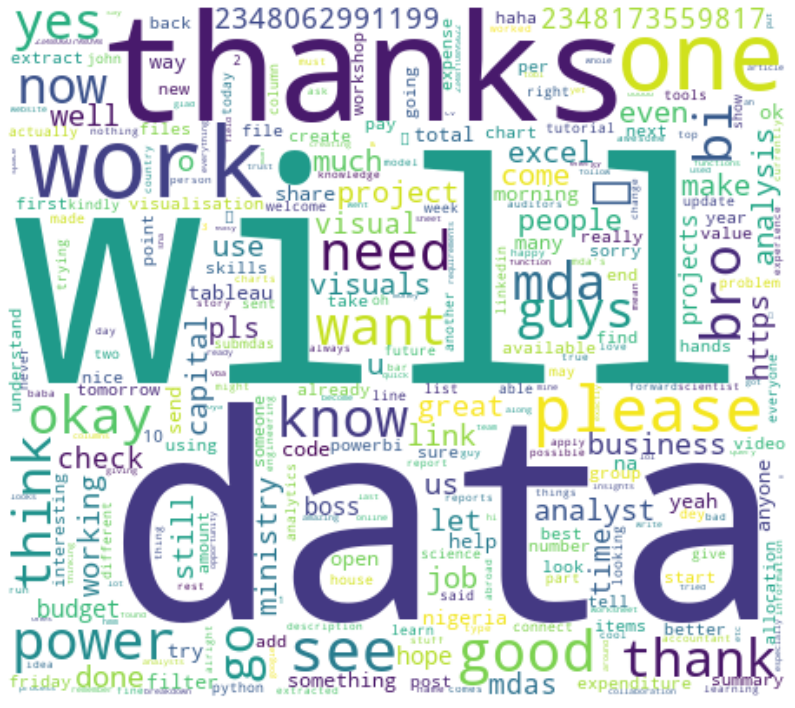

In [40]:
%matplotlib inline
text = wordcloud_df.Content.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=400, max_words=300, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(14, 18))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png', bbox_inches='tight')
plt.show()

In [45]:
from PIL import Image
image_mask = np.array(Image.open('Chaticon.jpeg'))

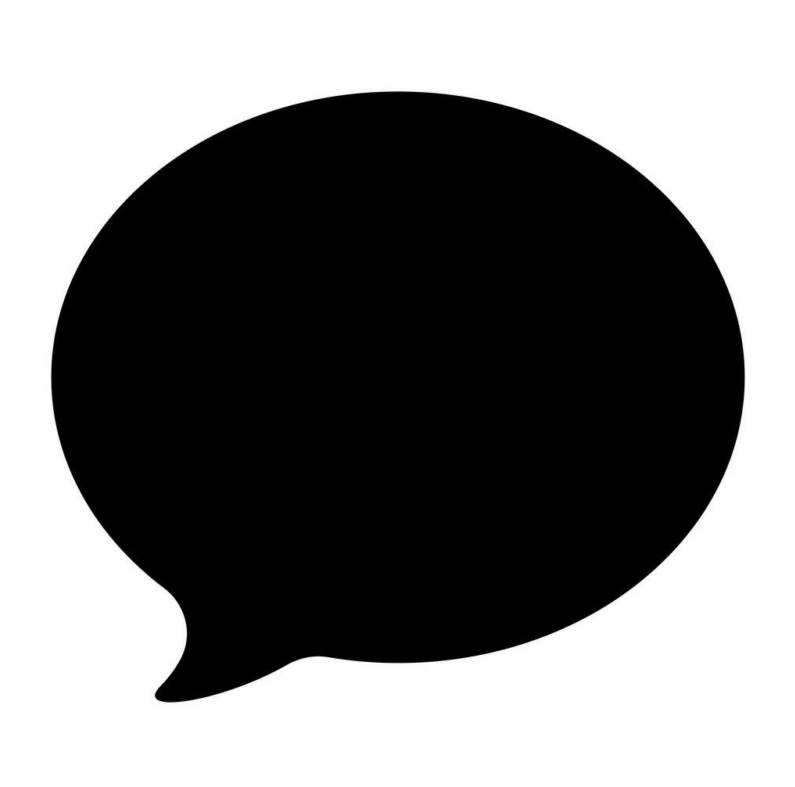

In [46]:
#visualizing the mask
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

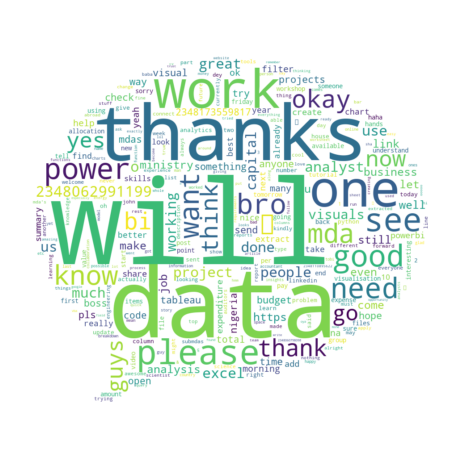

In [47]:
%matplotlib inline
text = wordcloud_df.Content.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=400, max_words=300, mask=image_mask, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(8, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud1.png', bbox_inches='tight')
plt.show()